In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [6]:
# Train-test split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# # Normalization
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
model_accuracy = {}
from sklearn import metrics
import pickle
# from google.colab import files 

In [9]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dt.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = dt.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
CM_Dt = metrics.confusion_matrix(y_test, y_pred)


print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
model_accuracy['Decision Tree'] = (cm_test[0][0] + cm_test[1][1])/len(y_test)



Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7704918032786885


In [10]:
cm_dt = CM_Dt.astype('float') / CM_Dt.sum(axis=1)[:, np.newaxis]

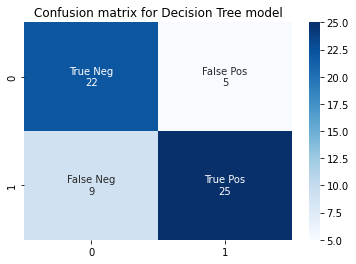

In [11]:
labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_Dt.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for Decision Tree model')
sns.heatmap(CM_Dt, annot=labels, fmt='', cmap='Blues');

In [12]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = rf.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
CM_RF = metrics.confusion_matrix(y_test, y_pred)


print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
model_accuracy['Random Forest'] = (cm_test[0][0] + cm_test[1][1])/len(y_test)



Accuracy for training set for Random Forest = 0.9917355371900827
Accuracy for test set for Random Forest = 0.8360655737704918


In [13]:
cm_rf = CM_RF.astype('float') / CM_RF.sum(axis=1)[:, np.newaxis]

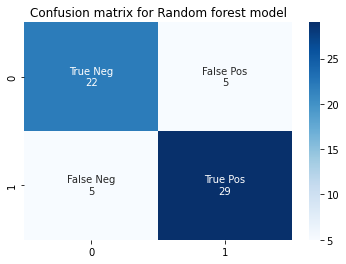

In [14]:
labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_RF.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for Random forest model')
sns.heatmap(CM_RF, annot=labels, fmt='', cmap='Blues');

In [16]:
# SVM

from sklearn.svm import SVC
SVC = SVC(kernel = 'rbf')
SVC.fit(X_train, y_train)

# Predicting the Test set results
y_pred = SVC.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = SVC.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
CM_SVC = metrics.confusion_matrix(y_test, y_pred)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
model_accuracy['SVM'] = (cm_test[0][0] + cm_test[1][1])/len(y_test)



Accuracy for training set for svm = 0.8925619834710744
Accuracy for test set for svm = 0.8688524590163934


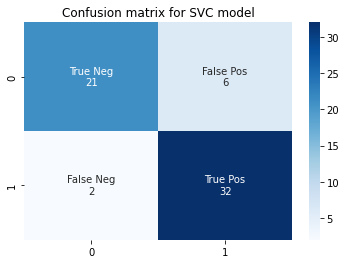

In [17]:
cm_SVC = CM_SVC.astype('float') / CM_SVC.sum(axis=1)[:, np.newaxis]

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_SVC.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for SVC model')
sns.heatmap(CM_SVC, annot=labels, fmt='', cmap='Blues');

In [18]:
#Naive Bayes model
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predicting the Test set results
y_pred = nb.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = nb.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
CM_Nb = metrics.confusion_matrix(y_test, y_pred)


print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
model_accuracy['Naive Bayes'] = (cm_test[0][0] + cm_test[1][1])/len(y_test)



Accuracy for training set for Naive Bayes = 0.8347107438016529
Accuracy for test set for Naive Bayes = 0.8524590163934426


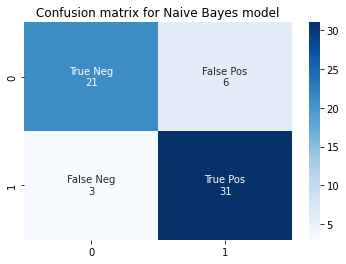

In [19]:
cm_Nb = CM_Nb.astype('float') / CM_Nb.sum(axis=1)[:, np.newaxis]

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_Nb.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for Naive Bayes model')
sns.heatmap(CM_Nb, annot=labels, fmt='', cmap='Blues');

In [20]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
CM_Kn = metrics.confusion_matrix(y_test, y_pred)


print()
print('Accuracy for training set for KNN = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for KNN = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
model_accuracy['KNN'] = (cm_test[0][0] + cm_test[1][1])/len(y_test)



Accuracy for training set for KNN = 0.859504132231405
Accuracy for test set for KNN = 0.8360655737704918


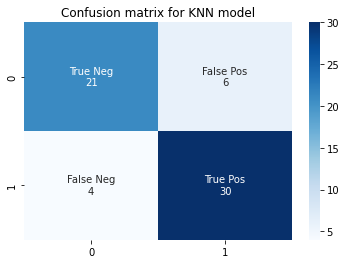

In [21]:
cm_Kn = CM_Kn.astype('float') / CM_Kn.sum(axis=1)[:, np.newaxis]

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_Kn.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for KNN model')
sns.heatmap(CM_Kn, annot=labels, fmt='', cmap='Blues');

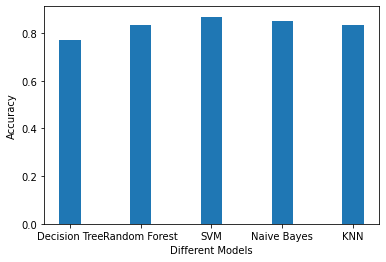

In [22]:
plt.bar(*zip(*model_accuracy.items()),width=0.3)
plt.xlabel('Different Models')
plt.ylabel("Accuracy")
plt.show()

In [23]:

data_items = model_accuracy.items()
data_list = list(data_items)
accuracy = pd.DataFrame(data_list)
print(accuracy)


               0         1
0  Decision Tree  0.770492
1  Random Forest  0.836066
2            SVM  0.868852
3    Naive Bayes  0.852459
4            KNN  0.836066
